# OPIM 5894 Lecture 6. Visualization
Jing Peng <br>
UConn School of Business <br>
October 4, 2017 <br>
Reference: https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Visualization Basics
### A. Plotting tools in Python
* Matplotlib
* Pandas (call Matplotlib)
* Seaborn
* ggplot
* Bokeh
* Plotly
* pygal
* ...<br>

A Biased Overview: http://pbpython.com/visualization-tools-1.html

## B. Plots Supported in Pandas
* plot (x-y plot)
* bar or barh
* hist
* box
* kde
* area
* scatter
* hexbin
* pie
* ...

See https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

## C. figure and ax in matplotlib
Helpful in creating figures with subplots <br>
https://stackoverflow.com/questions/37970424/what-is-the-difference-between-drawing-plots-using-plot-axes-or-figure-in-matpl
https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

# 1. Basic Plots
### 1.1 x-y plot

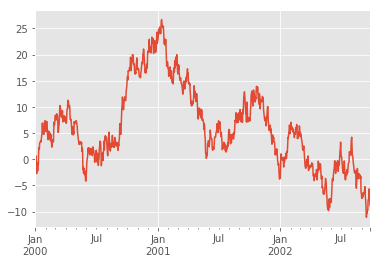

In [4]:
# One curve
np.random.seed(6)
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [13]:
df.head()

,A,B,C,D
2000-01-01,-0.311784,0.729004,0.217821,-0.899092
2000-01-02,-2.798564,1.642255,1.344885,-2.413185
2000-01-03,-1.159273,1.212362,3.976165,-1.811363
2000-01-04,-1.495155,2.450100,4.087293,-1.682212
2000-01-05,-1.419027,2.294972,4.721519,-0.871557


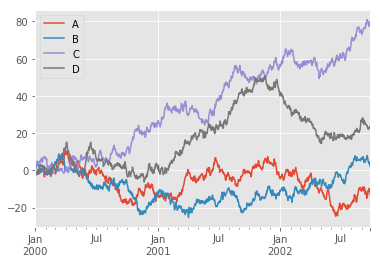

In [12]:
# multiple curves
np.random.seed(6)
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); # create a new figure (canvas)
df.plot();

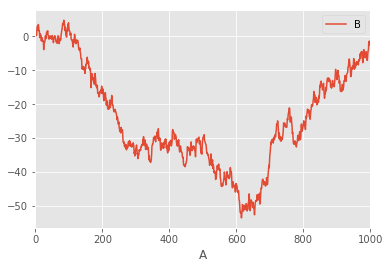

In [14]:
# plot a column (y) over given x
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

### 1.2 Bar plot (values of different groups)

In [29]:
df.plot?

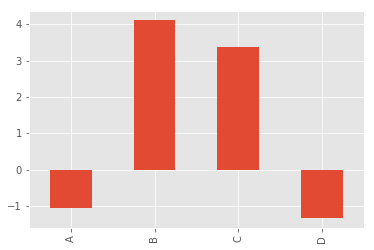

In [22]:
# The generic way
#plt.figure();
df.iloc[5].plot(kind='bar'); 

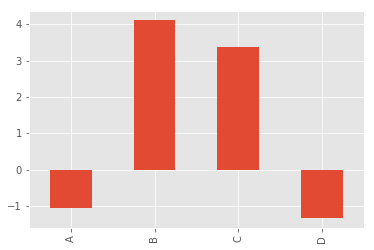

In [23]:
# An more intuitive way
plt.figure();
df.iloc[5].plot.bar()

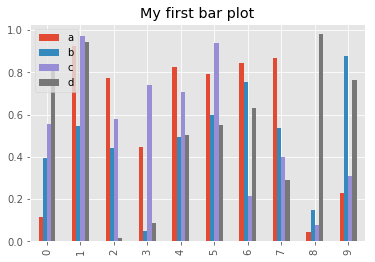

In [31]:
# multiple columns
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar(title='My first bar plot');

In [27]:
df2

,a,b,c,d
0,0.244255,0.665251,0.747738,0.266284
1,0.546382,0.002643,0.385599,0.575633
2,0.441187,0.204188,0.183435,0.428441
3,0.290610,0.557503,0.144469,0.174620
4,0.104759,0.727963,0.933743,0.067292
5,0.355942,0.238396,0.730536,0.641285
6,0.521739,0.170924,0.755662,0.733259
7,0.459890,0.260590,0.206457,0.066746
8,0.870046,0.804723,0.837752,0.669371
9,0.940915,0.872720,0.042073,0.536659


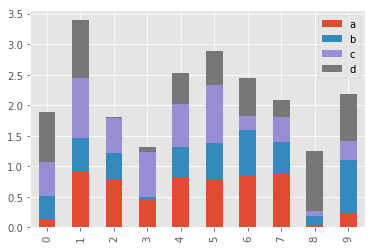

In [32]:
# multiple columns in a stacked format
df2.plot.bar(stacked=True);

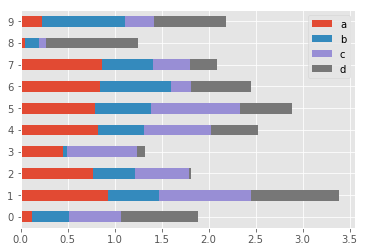

In [33]:
# horizontal
df2.plot.barh(stacked=True);

### 1.3 Histograms (distribution of values on one attribute)

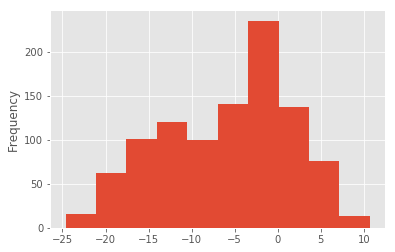

In [34]:
# One column
df.A.plot.hist()

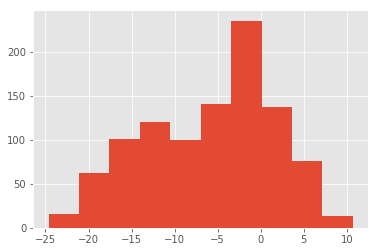

In [35]:
# A shorthand
df.A.hist()

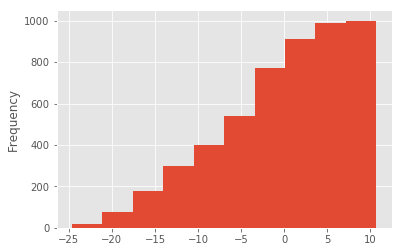

In [38]:
# Cumulative
plt.figure();
df.A.plot.hist(cumulative=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002976CDE32E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002976D361390>]], dtype=object)

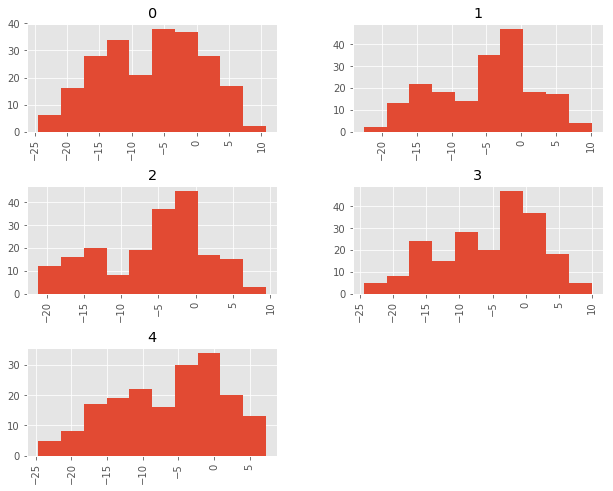

In [41]:
# grouped histograms
df.A.hist(by=np.random.randint(0, 5, 1000), figsize=(10, 8))

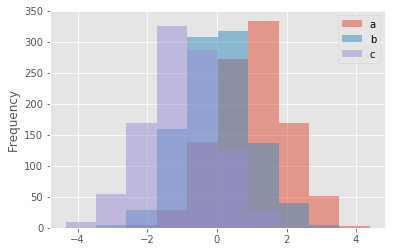

In [42]:
# multiple columns
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
        'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=0.5)

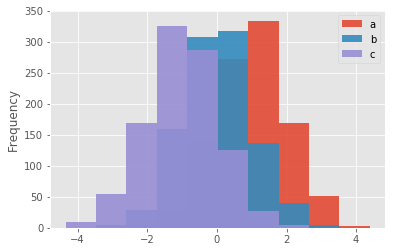

In [43]:
# what does alpha mean?
plt.figure();
df4.plot.hist(alpha=0.9)

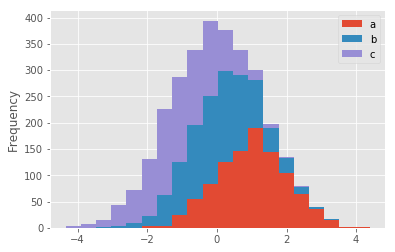

In [44]:
# stacked
plt.figure();
df4.plot.hist(stacked=True, bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002976DAD27F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002976DBB01D0>], dtype=object)

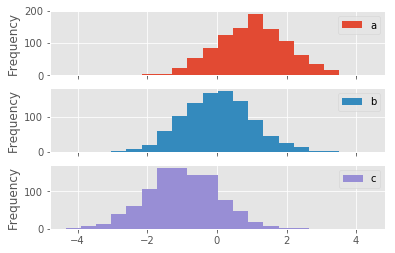

In [45]:
# in subplots
plt.figure();
df4.plot.hist(subplots=True, bins=20)

### 1.4 Area plot

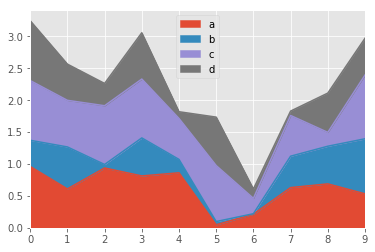

In [46]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area();

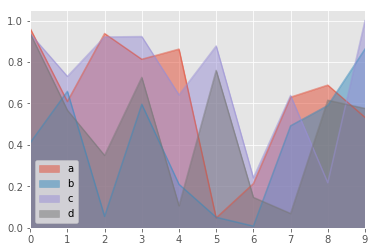

In [47]:
df.plot.area(stacked=False);

### 1.5 Scatter Plot

In [49]:
df

,a,b,c,d
0,0.937785,0.037295,0.039408,0.862674
1,0.043128,0.299691,0.604417,0.520719
2,0.152120,0.273125,0.651800,0.294544
3,0.642705,0.221736,0.218134,0.304242
4,0.671496,0.657210,0.396256,0.850170
5,0.781335,0.675994,0.639563,0.835210
6,0.512842,0.544125,0.393334,0.390615
7,0.214994,0.068179,0.083115,0.697876
8,0.322680,0.694349,0.028247,0.279715
9,0.366638,0.087377,0.519010,0.523913


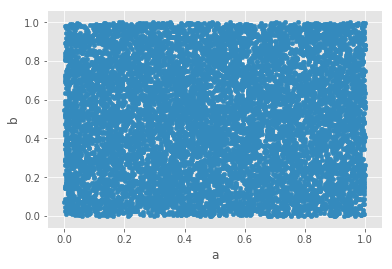

In [58]:
# one plot
df = pd.DataFrame(np.random.rand(10000, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

In [53]:
df['e'] = df.a + np.random.rand(50)
df

,a,b,c,d,e
0,0.344042,0.758767,0.559652,0.183060,1.275759
1,0.357760,0.464332,0.499345,0.973240,0.450847
2,0.663597,0.148780,0.414298,0.030899,0.667650
3,0.119188,0.015616,0.945392,0.760485,0.288924
4,0.064278,0.103639,0.934723,0.002789,0.833542
5,0.042662,0.013011,0.927383,0.631077,0.464987
6,0.718075,0.356468,0.318545,0.419240,0.757441
7,0.109052,0.616928,0.113127,0.488153,0.281909
8,0.689427,0.855060,0.715710,0.892538,0.938028
9,0.519740,0.118140,0.846725,0.265533,1.242843


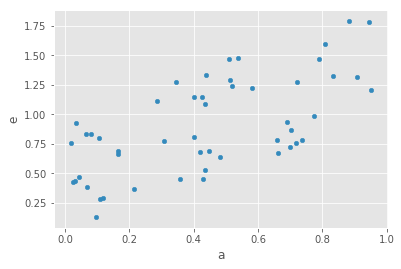

In [54]:
df.plot.scatter(x='a', y='e');

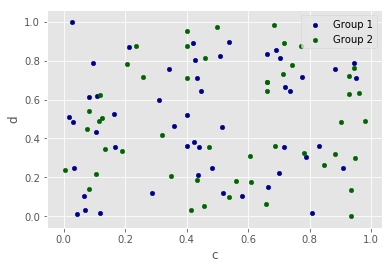

In [55]:
# overlayed plots
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

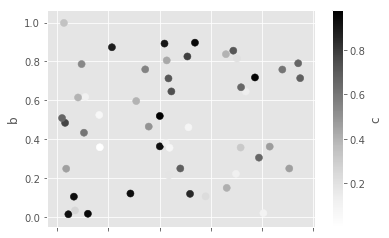

In [56]:
# point color by value
df.plot.scatter(x='a', y='b', c='c', s=50);

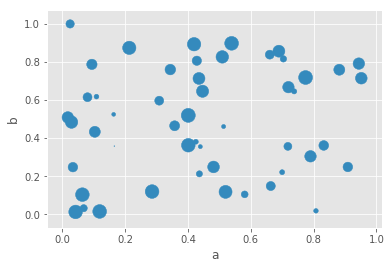

In [57]:
# point size by value
df.plot.scatter(x='a', y='b', s=df['c']*200);

### 1.6 Hexagonal Bin Plot
Similar to heat map, useful when scatter plot is too dense

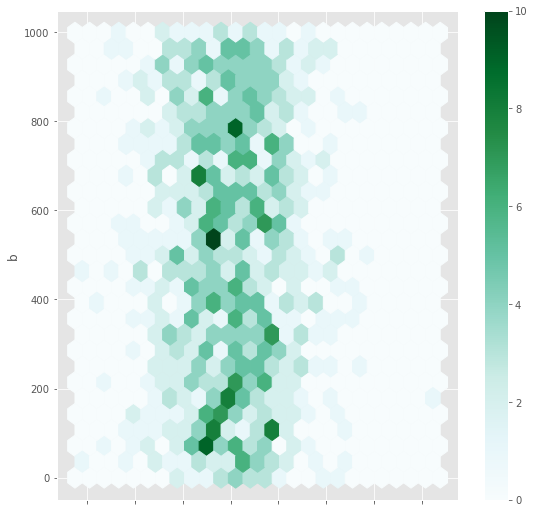

In [61]:
# As an alternative to scatter plot
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x='a', y='b', gridsize=25, figsize=(9,9))

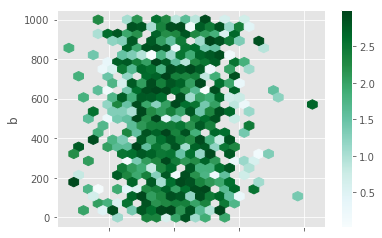

In [64]:
# As an alternative to 3D plot
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
    gridsize=25)

In [63]:
df

,a,b,z
0,0.975336,0.910868,2.231449
1,1.480580,1.366671,2.856060
2,-2.160359,0.555840,0.689080
3,-0.353556,3.745628,1.910307
4,-0.154816,4.610782,2.948822
5,-1.170254,5.636186,0.572383
6,-1.287497,6.059577,2.248782
7,-1.719997,8.474288,1.134002
8,-0.195302,6.493774,0.677908
9,-0.157443,6.863230,2.053168


### 1.7 Pie Chart

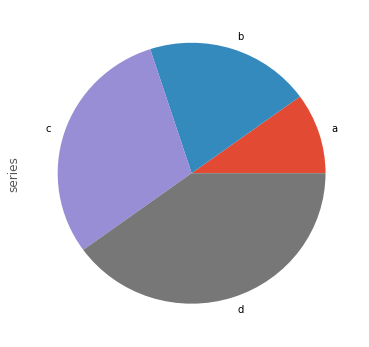

In [65]:
# One column
series = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))

In [67]:
df

,x,y
a,0.035585,0.625339
b,0.162800,0.627228
c,0.745939,0.425615
d,0.887615,0.882516


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002976F88A780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002976F1CB278>], dtype=object)

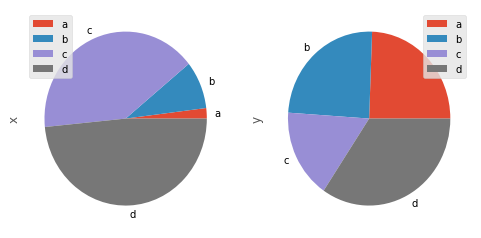

In [66]:
# Multiple columns
df = pd.DataFrame(np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

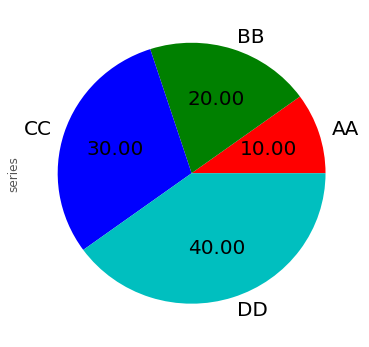

In [68]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                 autopct='%.2f', fontsize=20, figsize=(6, 6))

## 2. More Plotting Functions

### 2.1 Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002976E029710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002976FE0CBA8>]], dtype=object)

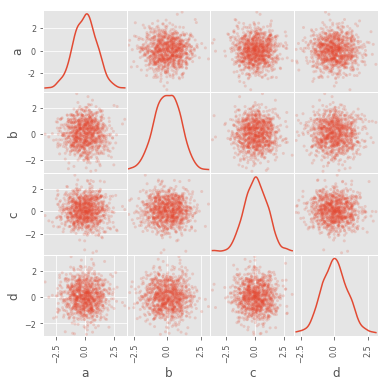

In [70]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

### 2.2 Kernal Density Plot

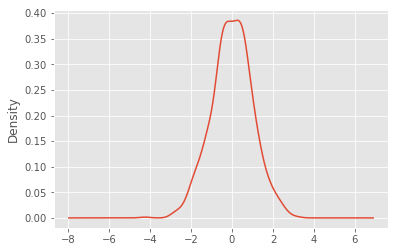

In [71]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

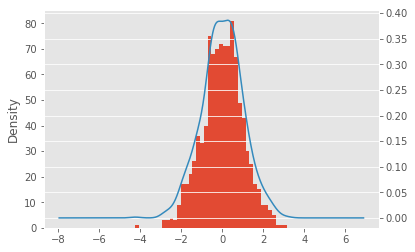

In [72]:
# Superimposed to histogram
ax = ser.plot.hist(bins=40)
ser.plot.kde(ax=ax, secondary_y=True)
# ax.set(xlim=[-4,4])

### 2.3 Bootstrap Plot (useful)

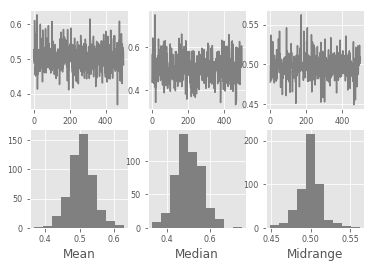

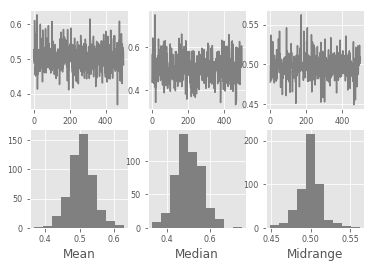

In [73]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color='grey')

## 3. Formatting/Customization
Further readings: http://pbpython.com/effective-matplotlib.html

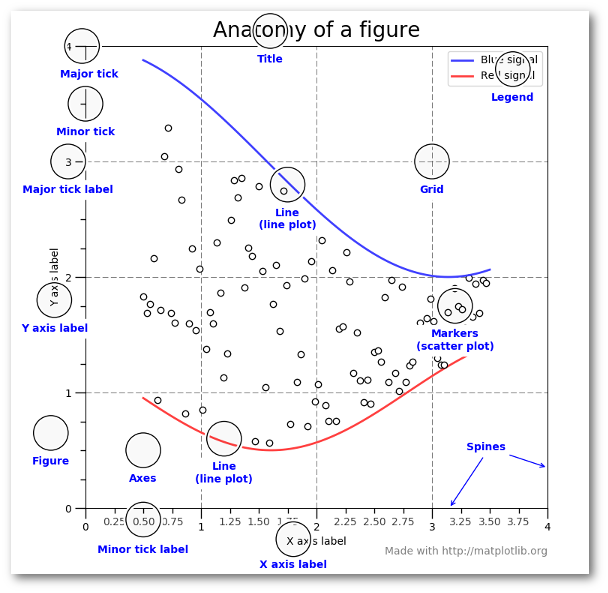

In [311]:
from IPython.display import Image
Image(filename='matplotlib-anatomy.png')

### 3.1 Line style

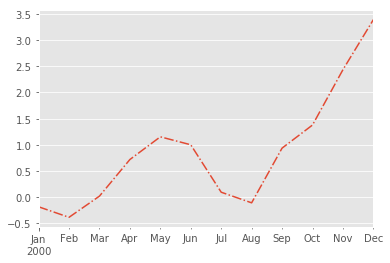

In [77]:
# some options: '-' | '--' | '-.' | ':' 
ts = pd.Series(np.random.randn(12), index=pd.date_range('1/1/2000', periods=12, freq='M'))
ts = ts.cumsum()
plt.figure()
ts.plot(style='-.', label='Series');

### 3.2 Legend

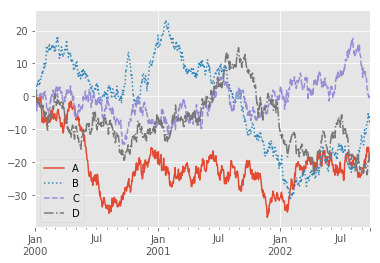

In [80]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot(legend=True,style=['-',':','--','-.'])

### 3.2 Scales

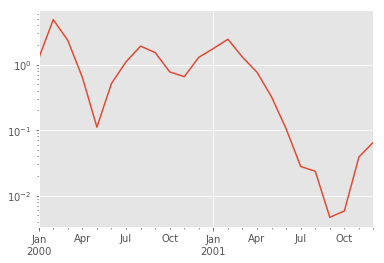

In [83]:
ts = pd.Series(np.random.randn(24), index=pd.date_range('1/1/2000', periods=24, freq='M'))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

### 3.3 Secondary Y-axis

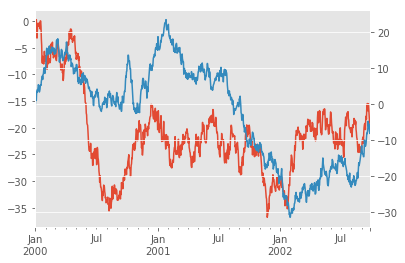

In [85]:
df.A.plot()
df.B.plot(secondary_y=True)

In [88]:
df = abs(df)
df

,A,B,C,D
2000-01-01,0.077404,0.193684,2.111668,1.151107
2000-01-02,1.822770,1.180026,2.823072,0.440366
2000-01-03,0.066823,1.081431,2.016521,1.031321
2000-01-04,0.236915,0.932101,3.162430,1.549504
2000-01-05,1.418581,3.211754,4.397425,1.195853
2000-01-06,3.215891,3.105444,4.330248,0.140507
2000-01-07,1.994190,3.878118,3.048290,1.939404
2000-01-08,0.625497,3.532113,2.596727,1.395604
2000-01-09,0.438680,4.515081,2.467686,0.554831
2000-01-10,0.949387,5.257728,1.493809,1.224300


In [89]:
# plot selective columns on secondary Y
# df = pd.DataFrame(np.random.randint(0, 100, size=(10,4)), columns=list('ABCD'))
df['pctA'] = df.A/df.sum(axis=1)
df

,A,B,C,D,pctA
2000-01-01,0.077404,0.193684,2.111668,1.151107,0.021903
2000-01-02,1.822770,1.180026,2.823072,0.440366,0.290888
2000-01-03,0.066823,1.081431,2.016521,1.031321,0.015925
2000-01-04,0.236915,0.932101,3.162430,1.549504,0.040285
2000-01-05,1.418581,3.211754,4.397425,1.195853,0.138755
2000-01-06,3.215891,3.105444,4.330248,0.140507,0.297986
2000-01-07,1.994190,3.878118,3.048290,1.939404,0.183627
2000-01-08,0.625497,3.532113,2.596727,1.395604,0.076749
2000-01-09,0.438680,4.515081,2.467686,0.554831,0.054998
2000-01-10,0.949387,5.257728,1.493809,1.224300,0.106371


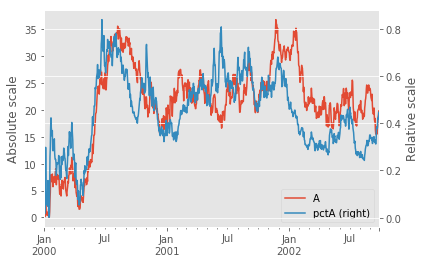

In [90]:
plt.figure()
ax = df[['A','pctA']].plot(secondary_y=['pctA'])
ax.set_ylabel('Absolute scale')
ax.right_ax.set_ylabel('Relative scale')

### 3.4 Subplots (Important)

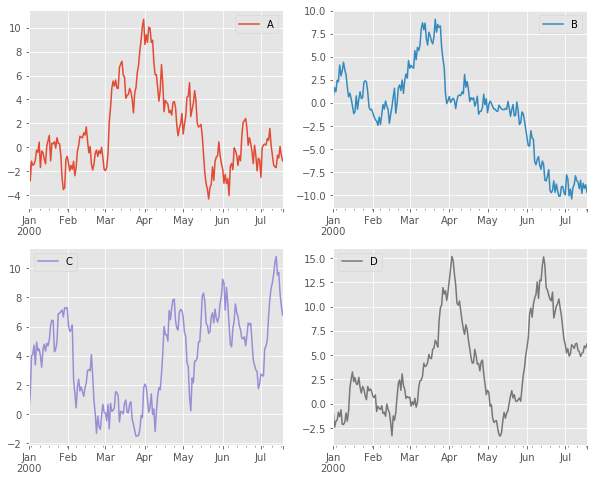

In [91]:
np.random.seed(6)
df = pd.DataFrame(np.random.randn(200, 4), index=pd.date_range('1/1/2000', periods=200, freq='D'), columns=list('ABCD'))
df = df.cumsum()
df.plot(subplots=True, layout=(2, 2), figsize=(10,8), sharex=False);

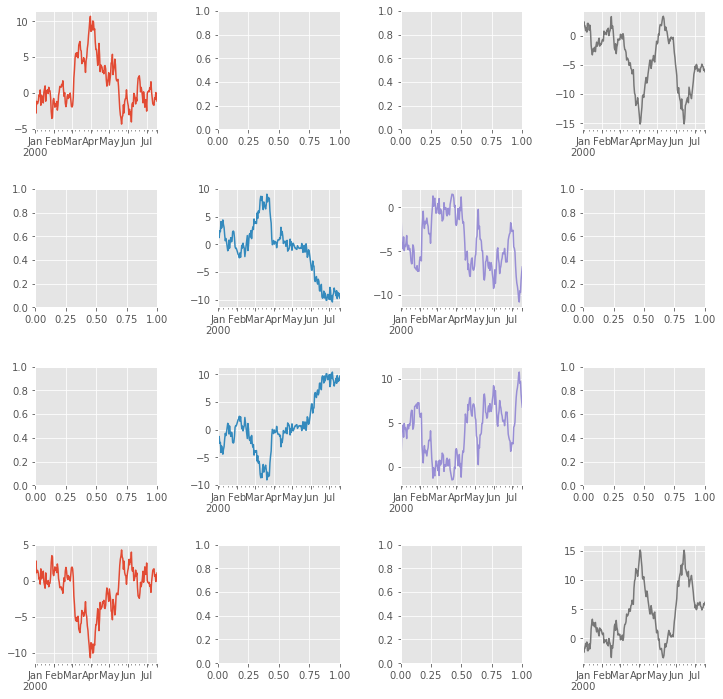

In [92]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12));
plt.subplots_adjust(wspace=0.5, hspace=0.5);
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False);

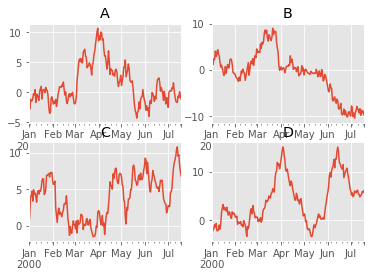

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D');

### 3.5 Error Bars

In [94]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], 
                                names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)
df3

data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5

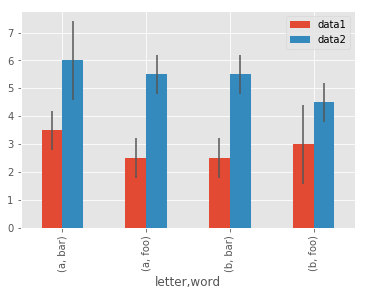

In [96]:

# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
# the standard deviation is not the standard error of mean
errors = gp3.std()
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax)

In [98]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

### 3.6 Color Map

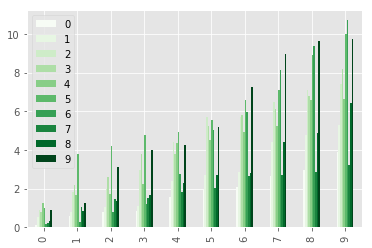

In [99]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure()
dd.plot.bar(colormap='Greens')

## 4. Plot directly with matplotlib

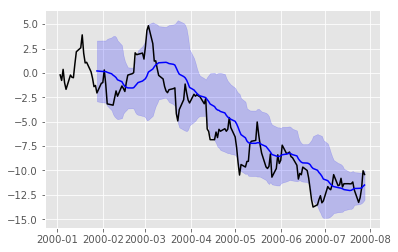

In [100]:
# matlab style plot
price = pd.Series(np.random.randn(150).cumsum(),
     index=pd.date_range('2000-1-1', periods=150, freq='B'))
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)